# Mack chainladder model

We will explore the properties and methods underlying the MackChainladder class.

As usual, we we import the chainladder package as well as the popular pandas package.  For plotting purposes, we will also be using Jupyter's `%matplotlib inline` magic function.  

### Load package and data

In [1]:
import chainladder as cl
import pandas as pd
%matplotlib inline

C:\Users\jboga\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We will be exploring the MackChainladder class on the `GenIns` dataset included in the **chainladder** package.  Let's load the triangle and look at it.

In [2]:
GI = cl.load_dataset('GenIns')
GI_tri = cl.Triangle(GI)
GI_tri.data

dev,1,2,3,4,5,6,7,8,9,10
origin,,,,,,,,,,
1.0,357848,1124788.0,1735330.0,2218270.0,2745596.0,3319994.0,3466336.0,3606286.0,3833515.0,3901463.0
2.0,352118,1236139.0,2170033.0,3353322.0,3799067.0,4120063.0,4647867.0,4914039.0,5339085.0,NaN
3.0,290507,1292306.0,2218525.0,3235179.0,3985995.0,4132918.0,4628910.0,4909315.0,NaN,NaN
4.0,310608,1418858.0,2195047.0,3757447.0,4029929.0,4381982.0,4588268.0,NaN,NaN,NaN
5.0,443160,1136350.0,2128333.0,2897821.0,3402672.0,3873311.0,NaN,NaN,NaN,NaN
6.0,396132,1333217.0,2180715.0,2985752.0,3691712.0,NaN,NaN,NaN,NaN,NaN
7.0,440832,1288463.0,2419861.0,3483130.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,359480,1421128.0,2864498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,376686,1363294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create the MackChainladder model

To create a MackChainladder model, we can specify up to four elements. A triangle is the only non-optional element that needs to be specified to create the model.  Another parameter of interest we will be using here is the alpha parameter.

Thomas Mack establishes a parameter alpha as a way of generalizing the chainladder formula into a weighted least squares regression that works for:  
 *alpha = 0* : straight average of link-ratios  
 *alpha = 1* : volume weighted chainladder  
 *alpha = 2* : ordinary least squares regression with intercept 0
 
 The default parameter is *alpha = 1*
 
 For all other parameters, please refer to the documentation of the MackChainladder class.  
 
 **Load the Data**  

In [3]:
GI_mack = cl.MackChainladder(tri = GI_tri)

There are a variety of attributes and methods available in the MackChainladder class.  Most of these borrow notation similar to that of the **[R chainladder](https://github.com/mages/ChainLadder)** package, but there are a few differences.  A complete list of attributes and methods are shown below.  Details on these are contained in the [documentation](MackChainLadder.html) of this module.

** Available attributes and methods **

In [4]:
[item for item in dir(GI_mack) if item[:1]!='_']

['Fse',
 'age_to_age',
 'alpha',
 'chainladder',
 'dict_plot',
 'f',
 'fse',
 'full_triangle',
 'get_Fse',
 'get_parameter_risk',
 'get_process_risk',
 'get_tail_se',
 'get_tail_sigma',
 'get_tail_weighted_time_period',
 'get_total_parameter_risk',
 'is_exponential_tail_appropriate',
 'mack_se',
 'plot',
 'sigma',
 'summary',
 'total_mack_se',
 'total_parameter_risk',
 'total_process_risk',
 'triangle',
 'weights']

### Mack model summary

A useful method is the summary() method.  This will produce, by origin period, the IBNR estimate based off of the MackChainladder model as well as its corresponding standard error.  This is useful in gaining deeper insight into the uncertainty in the model.

In [5]:
GI_mack.summary().round(3)

,Latest,Dev to Date,Ultimate,IBNR,Mack S.E.,CV(IBNR)
origin,,,,,,
1.0,3901463.0,1.000,3901463.000,0.000,0.000,NaN
2.0,5339085.0,0.983,5433718.815,94633.815,71835.187,0.759
3.0,4909315.0,0.913,5378826.290,469511.290,119473.736,0.254
4.0,4588268.0,0.866,5297905.821,709637.821,131572.833,0.185
5.0,3873311.0,0.797,4858199.639,984888.639,260530.015,0.265
6.0,3691712.0,0.722,5111171.458,1419459.458,410406.890,0.289
7.0,3483130.0,0.615,5660770.620,2177640.620,557795.542,0.256
8.0,2864498.0,0.422,6784799.012,3920301.012,874882.218,0.223
9.0,1363294.0,0.242,5642266.263,4278972.263,970959.785,0.227


### Plotting the Mack model

In many cases, we prefer a visual representation of the model, and can represent much of the same data contained in the summary() method by calling the plot() method.

The plot() method can be passed a list of desired plots or it can be generically called to plot all available plots.  

** Individual plot **

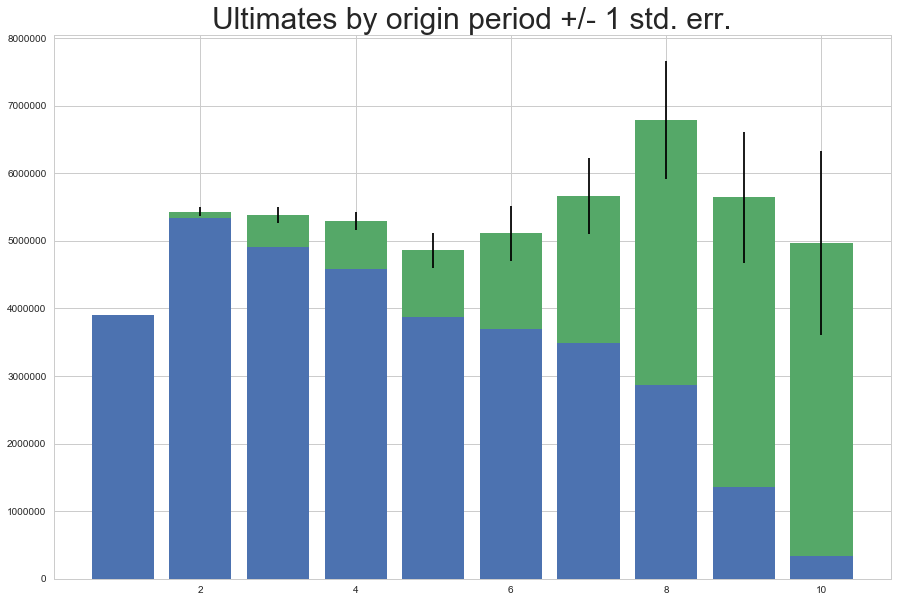

In [6]:
GI_mack.plot(plots=['summary'])

** Plotting default (all plots) **

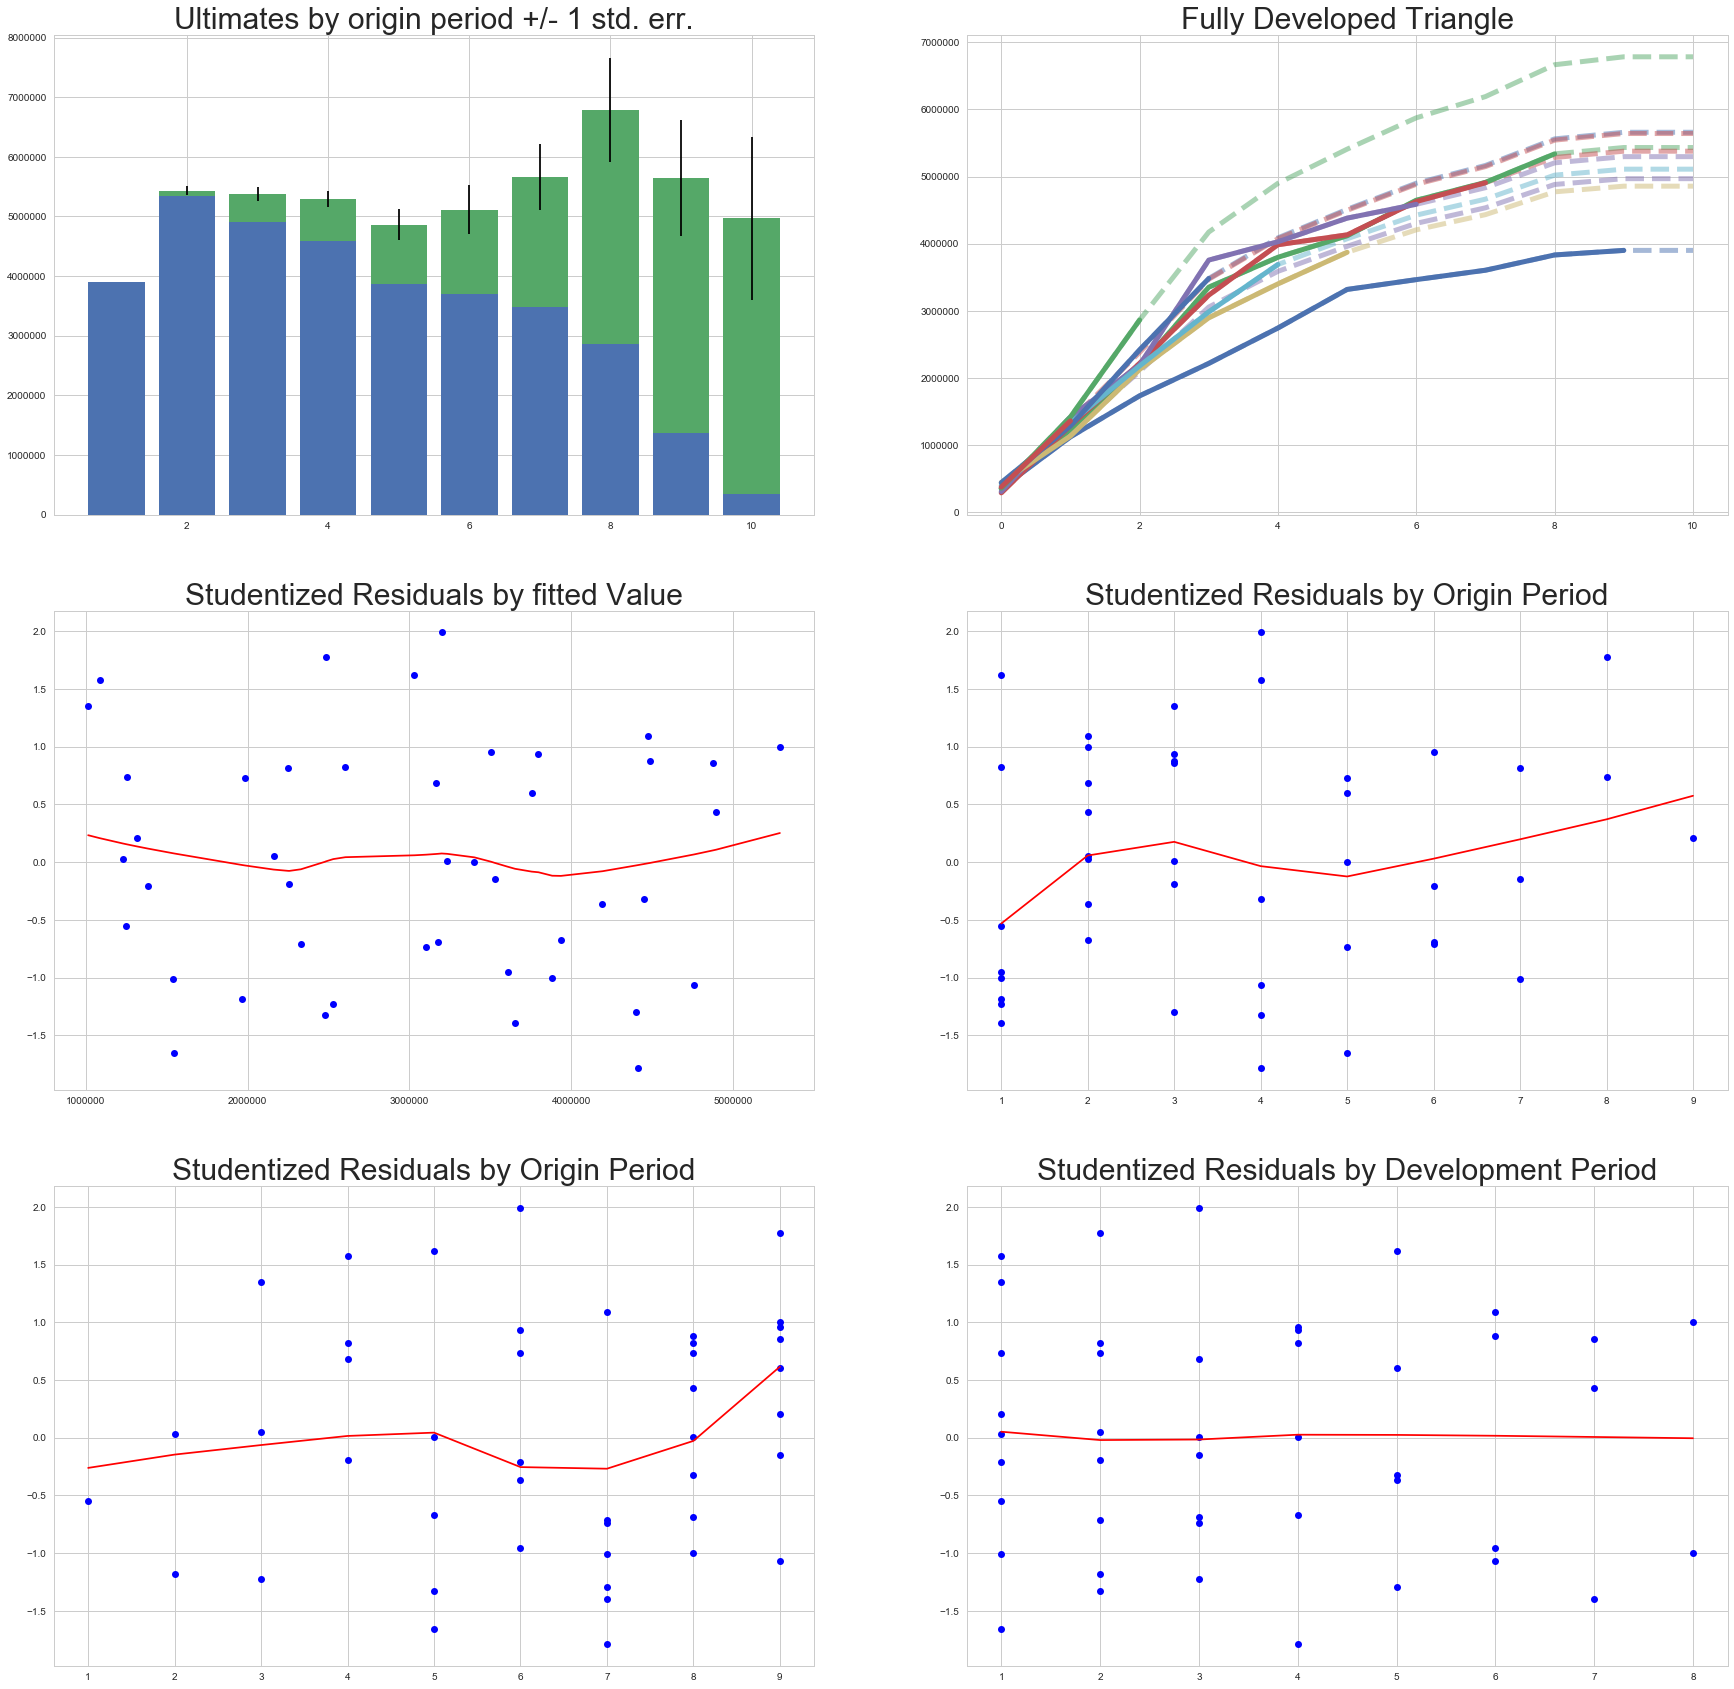

In [7]:
GI_mack.plot()